In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd
from gaussian_mixture_anomaly_detection import GaussianMixtureInTimeAnomalyDetector
from gaussian_mixture_anomaly_detection import extract_anomaly_target
import matplotlib.pyplot as plt
%matplotlib inline

простой пример: 10 двумерных временных рядов по 10 элементов в каждом,лежащие на 3x=2y со случайным нормальным смещением, а также 4 аномальные точки

In [2]:
T = 10
F = 40
N = 2

data = np.zeros((F, T, N))

for i in range(F):
    for t in range(T):
        data[i][t] = np.array([2,3]) * t + sps.norm.rvs(size=2,scale=0.5)
        
anomalies = [(0,5,0), (1,3,1), (1,4,1), (2,8,1), (3,2,0)]
for a in anomalies:
    data[a[0]][a[1]][a[2]] += 5

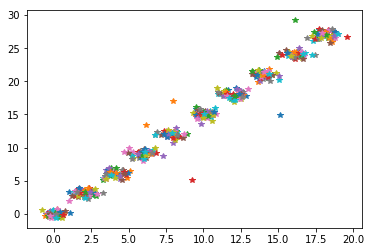

In [3]:
for i in range(F):
    plt.plot(data[i][:, 0], data[i][:, 1], '*')

In [4]:
detector = GaussianMixtureInTimeAnomalyDetector(n_components=10, random_state=1)

In [5]:
scores = detector.fit(data)  # scores  - лограифмическое правдоподобие нормальности для каждого сэмпла

100%|██████████| 40/40 [00:00<00:00, 358.33it/s]

Start probabilities memorization


выявление аномальных сэмплов:

In [6]:
detector.find_anomalies(scores, log_likelihood_threshold=0)

([(-22.583743646681533, (3, 2)),
  (-13.440199986112916, (1, 4)),
  (-8.9053169883591163, (1, 3)),
  (-1.5566327899117172, (2, 8)),
  (-1.3979962223817162, (6, 1)),
  (-1.2785253312704272, (22, 8)),
  (-1.0240896886846418, (3, 9)),
  (-1.020792451384988, (0, 5)),
  (-0.54896892922049423, (14, 4)),
  (-0.47888121444842796, (23, 8)),
  (-0.34793997294768841, (27, 9)),
  (-0.2870527621404359, (39, 9)),
  (-0.23758316043236932, (16, 9)),
  (-0.23321570873472361, (4, 5)),
  (-0.2050582900037195, (30, 9)),
  (-0.12783028395982152, (15, 9)),
  (-0.12637910583279233, (38, 6)),
  (-0.049206430827321887, (19, 8)),
  (-0.00033834122097885021, (13, 8))],
 0)

In [7]:
detector.find_anomalies(scores, anomaly_top=0.05)

([(-22.583743646681533, (3, 2)),
  (-13.440199986112916, (1, 4)),
  (-8.9053169883591163, (1, 3)),
  (-1.5566327899117172, (2, 8)),
  (-1.3979962223817162, (6, 1)),
  (-1.2785253312704272, (22, 8)),
  (-1.0240896886846418, (3, 9)),
  (-1.020792451384988, (0, 5)),
  (-0.54896892922049423, (14, 4)),
  (-0.47888121444842796, (23, 8)),
  (-0.34793997294768841, (27, 9)),
  (-0.2870527621404359, (39, 9)),
  (-0.23758316043236932, (16, 9)),
  (-0.23321570873472361, (4, 5)),
  (-0.2050582900037195, (30, 9)),
  (-0.12783028395982152, (15, 9)),
  (-0.12637910583279233, (38, 6)),
  (-0.049206430827321887, (19, 8)),
  (-0.00033834122097885021, (13, 8)),
  (0.060033678351416646, (23, 9)),
  (0.072562438524659642, (14, 8))],
 0.072562438524659642)

как видно аномалии попали в топ 5%

In [8]:
detector.find_anomalies(scores, anomaly_top=0.1, strategy='series')

([(-9.5517065067284559, 1),
  (-3.7120679407279895, 3),
  (15.074434840128957, 38),
  (17.77228807346696, 0),
  (17.791792509730357, 18)],
 17.791792509730357)

2 ряда с добавленными аномалиями попали в топ по сумме логорифимических правдоподобий

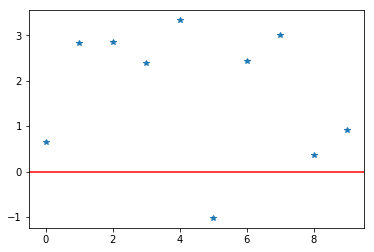

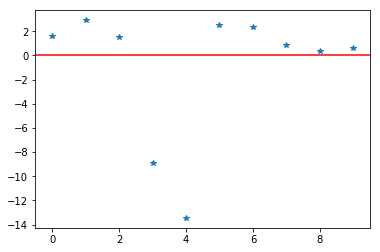

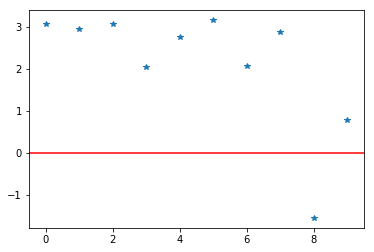

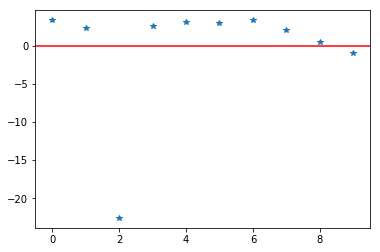

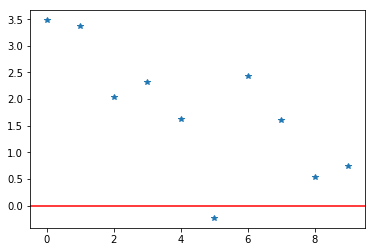

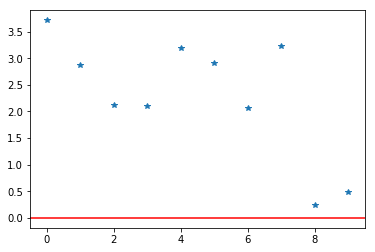

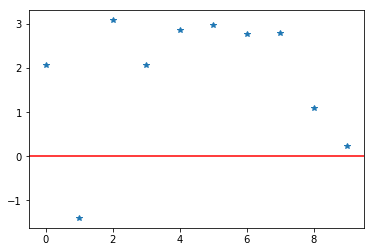

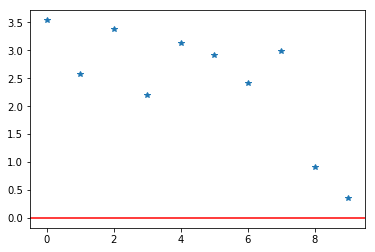

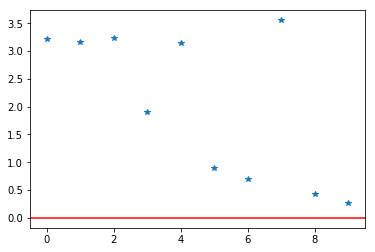

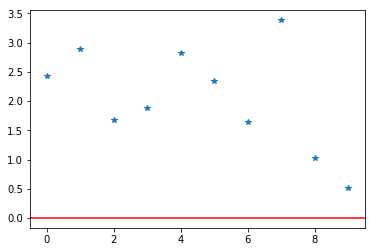

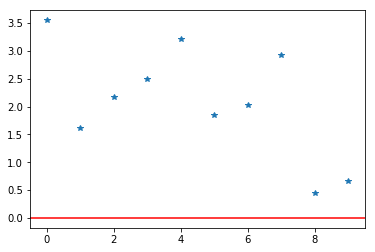

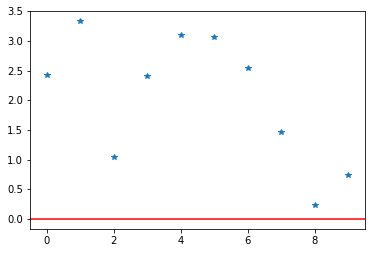

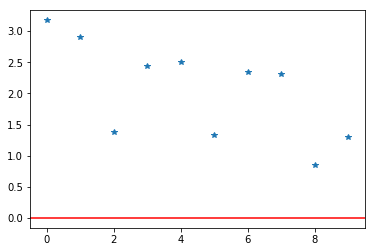

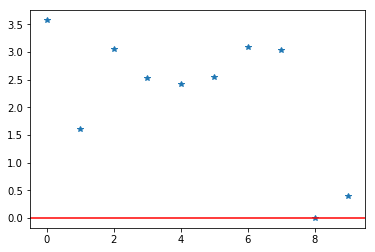

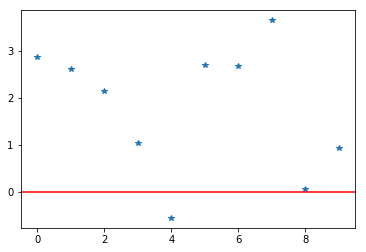

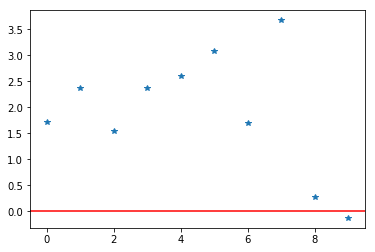

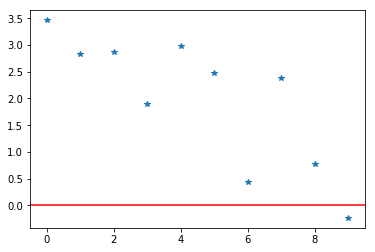

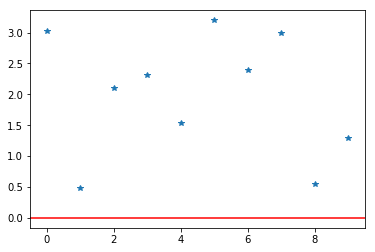

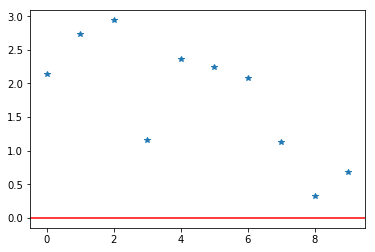

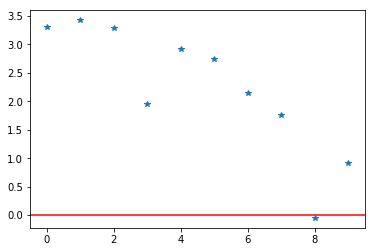

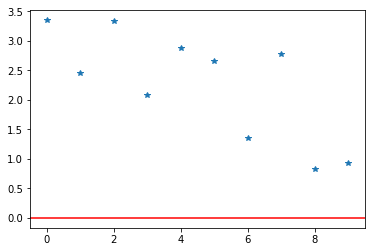

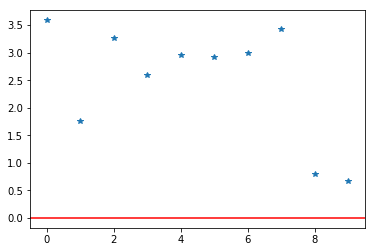

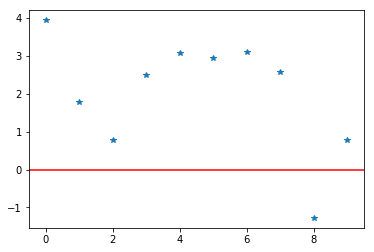

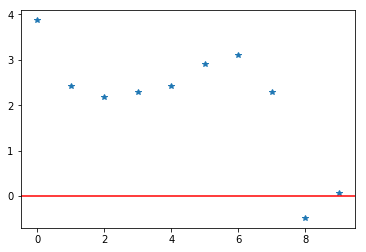

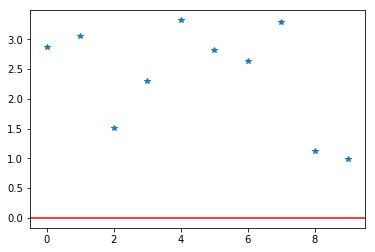

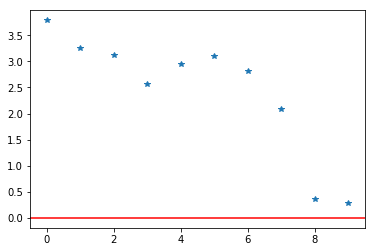

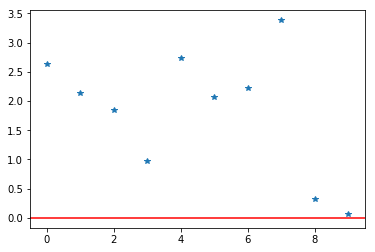

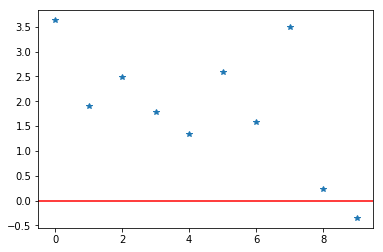

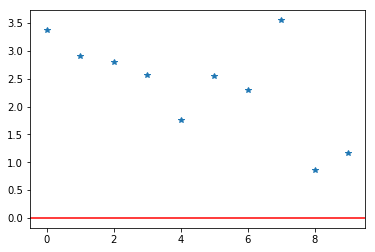

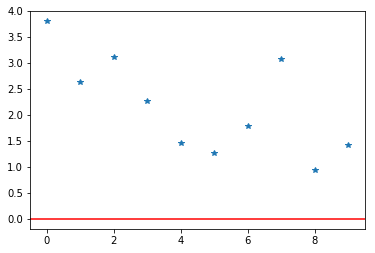

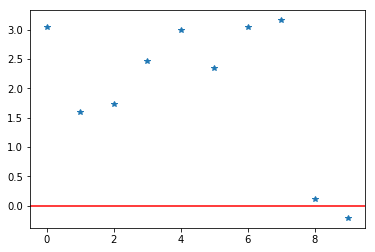

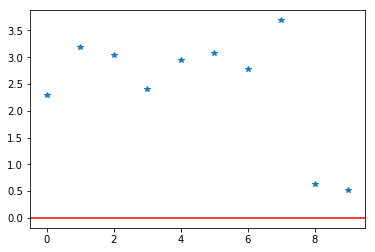

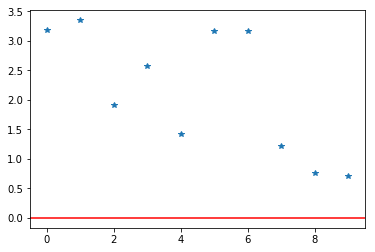

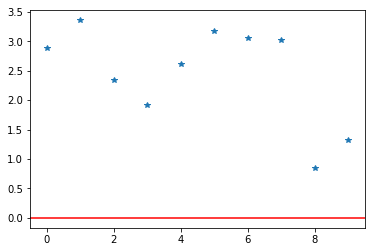

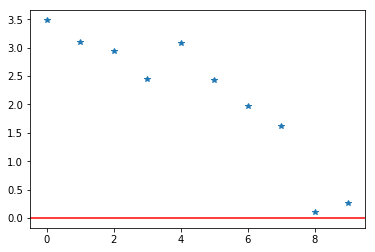

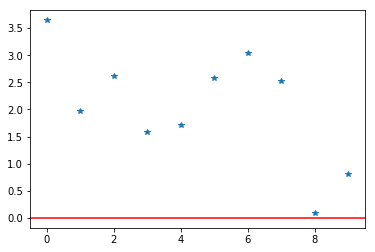

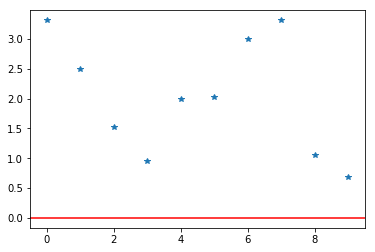

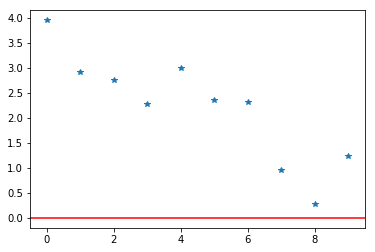

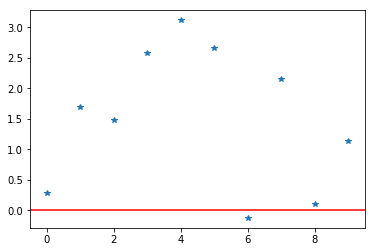

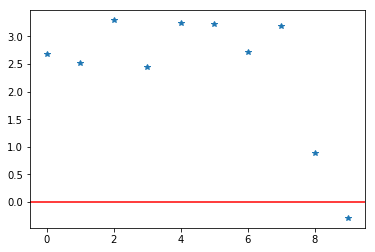

In [9]:
for f in range(F):
    plt.plot(range(T), scores[f],'*')
    plt.plot([-1, 10], [0,0],'r')
    plt.xlim([-0.5, 9.5])
    plt.show()

In [10]:
smoothed_scores = detector.smoothed_sample_anomalies(scores, halflife=2)

/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


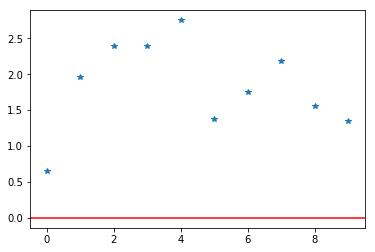

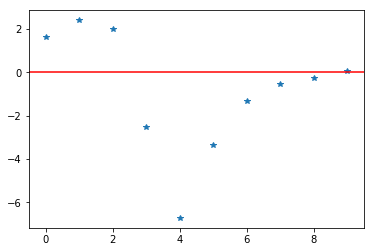

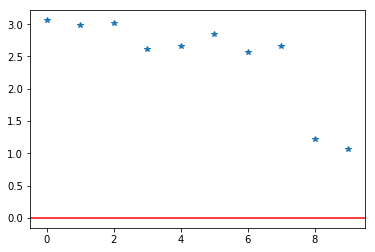

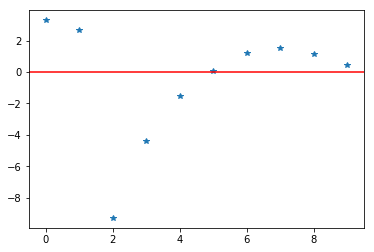

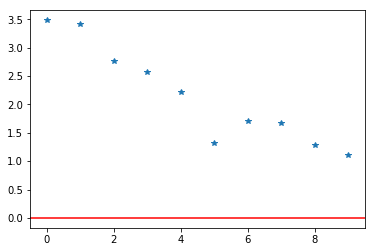

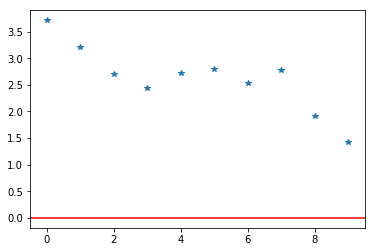

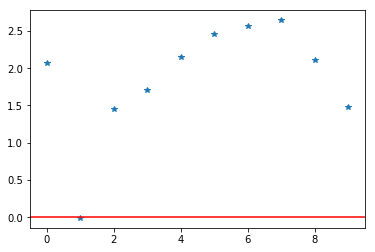

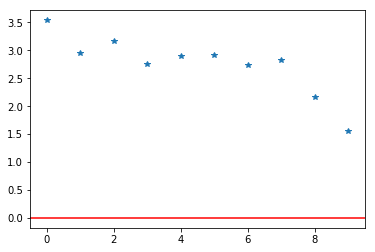

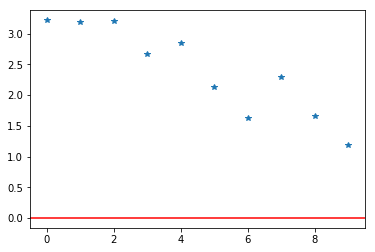

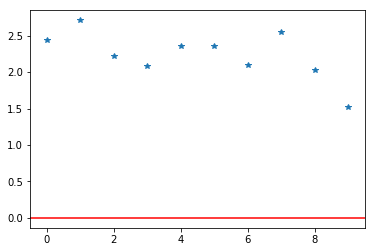

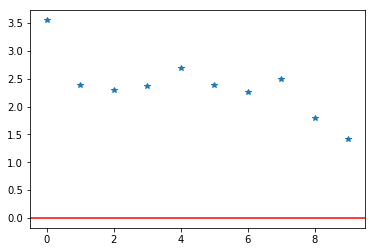

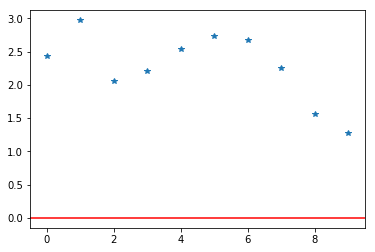

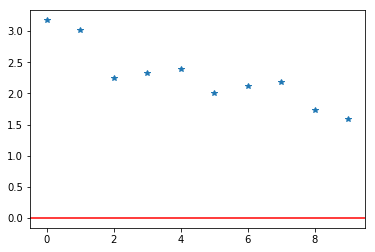

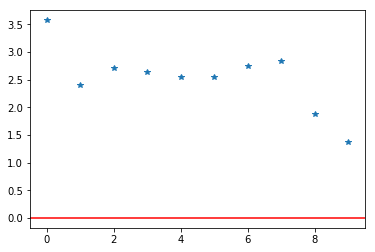

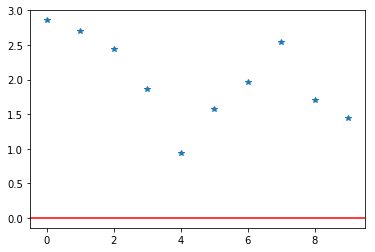

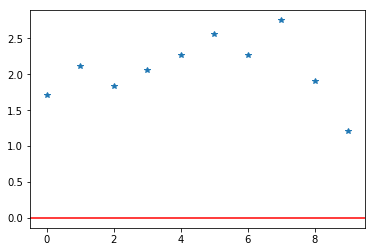

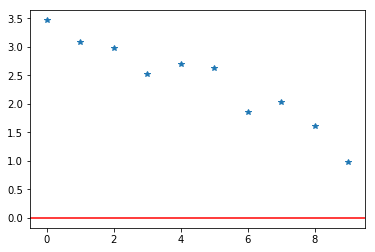

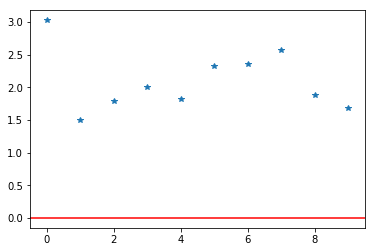

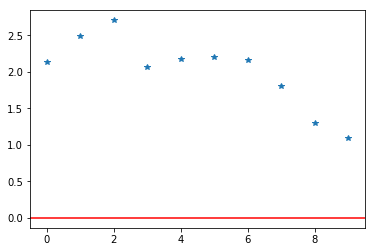

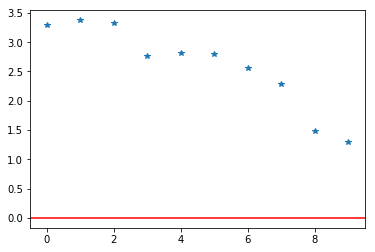

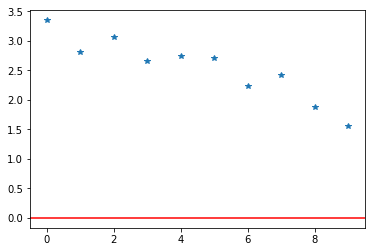

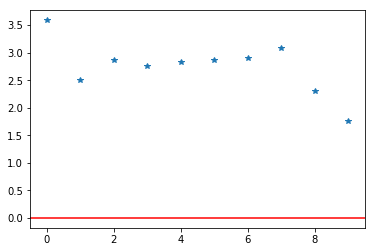

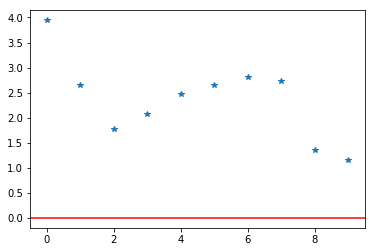

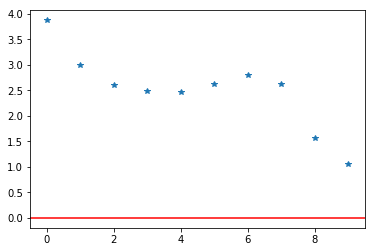

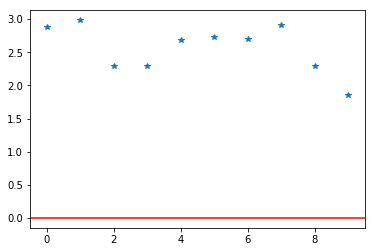

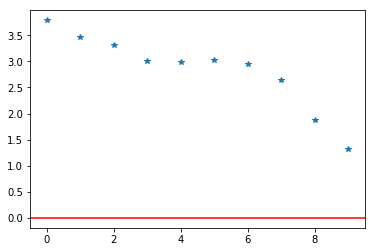

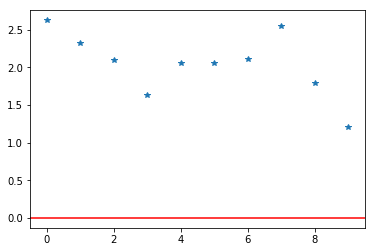

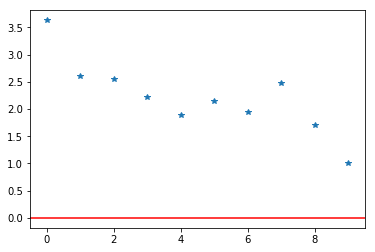

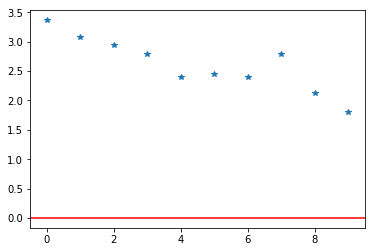

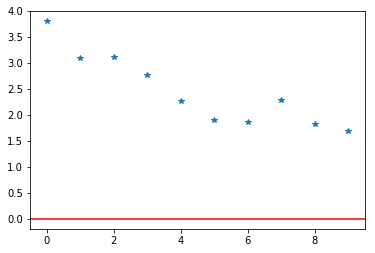

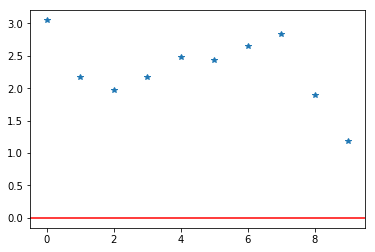

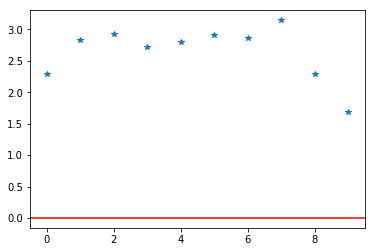

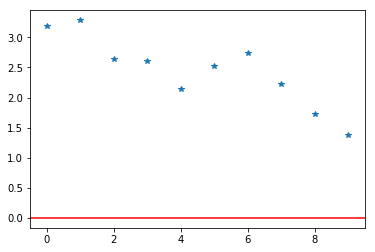

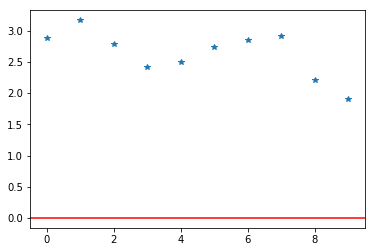

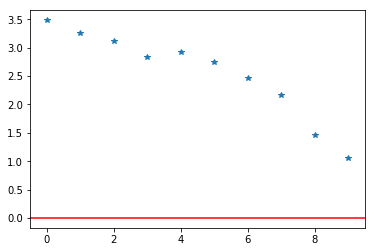

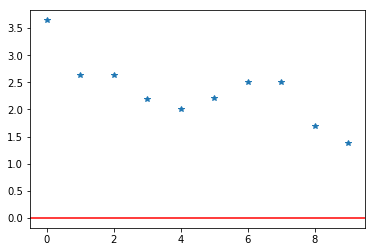

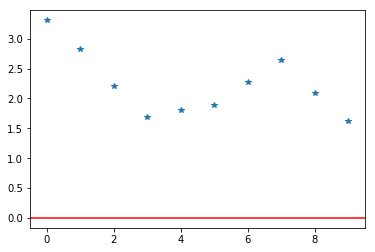

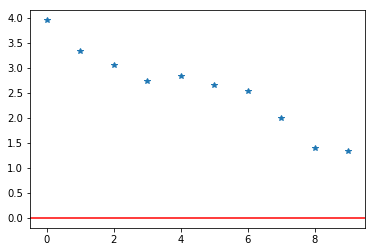

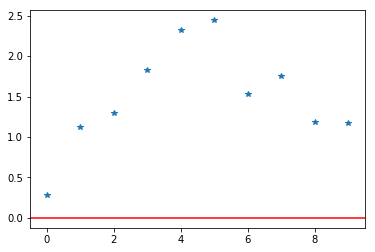

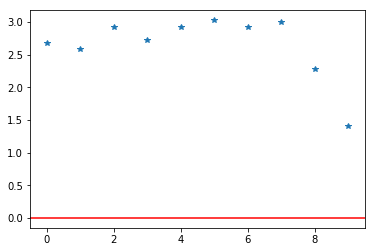

In [11]:
for f in range(F):
    plt.plot(range(T), smoothed_scores[f],'*')
    plt.plot([-1, 10], [0,0],'r')
    plt.xlim([-0.5, 9.5])
    plt.show()

In [16]:
targets =  extract_anomaly_target(pd.DataFrame(data.reshape(40 * 10, 2)), 40, 1, 2, 10, 0.01)
smoothed_scores = detector.smoothed_sample_anomalies(scores)

100%|██████████| 10/10 [00:00<00:00, 72.65it/s]

Start probabilities memorization



/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=1,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])
/Users/sergmiller/Documents/code/python/FlightAnomaliesDetection/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(com=2,min_periods=0,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


In [17]:
targets.shape

(400,)

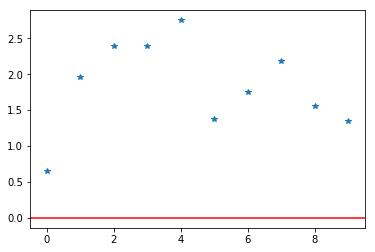

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


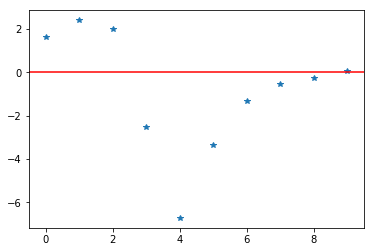

[ 0.  0.  1.  1.  1.  0.  0.  0.  0.  0.]


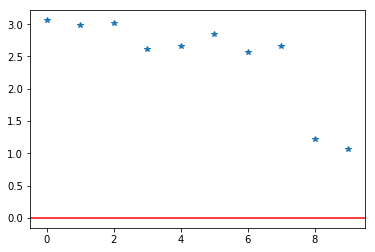

[ 0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]


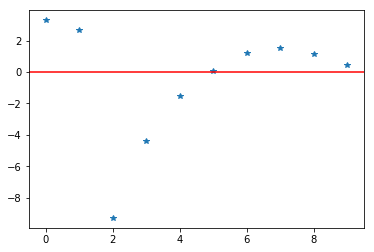

[ 0.  1.  1.  0.  0.  0.  0.  0.  0.  0.]


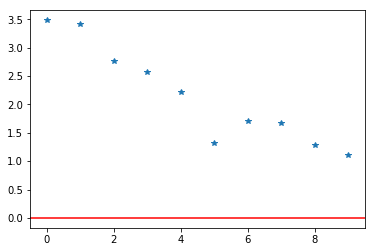

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


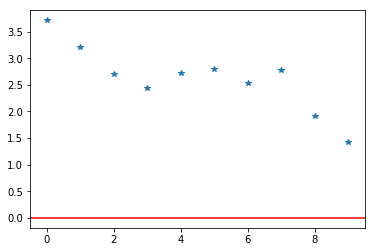

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


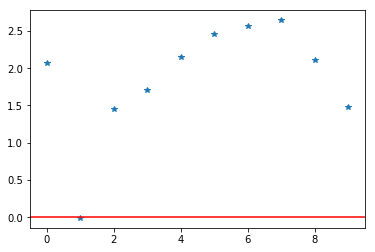

[ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


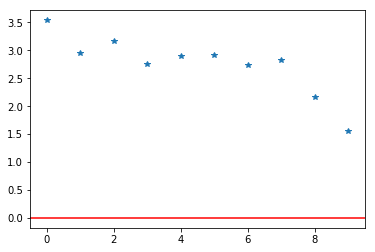

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


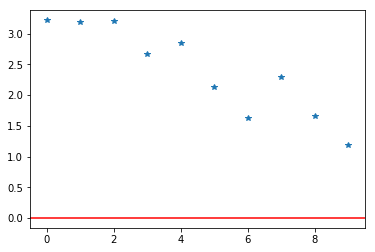

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


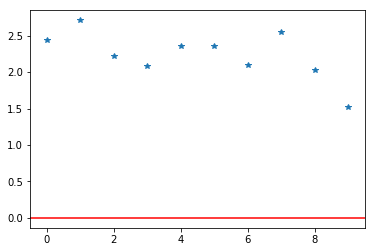

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


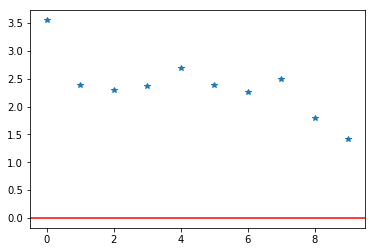

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


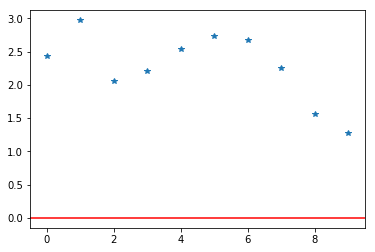

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


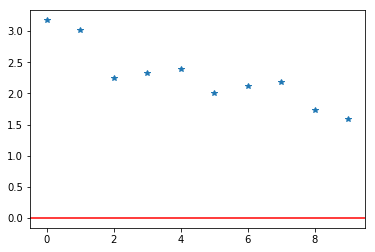

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


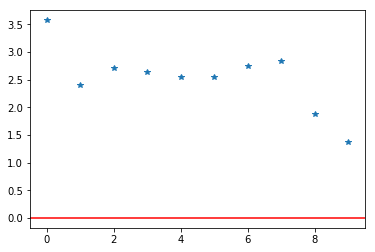

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


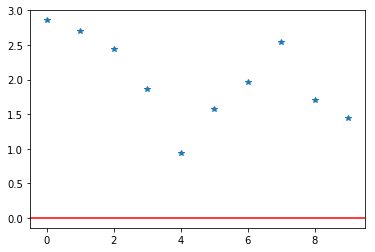

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


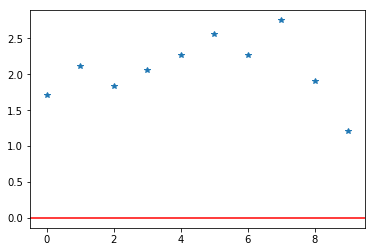

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


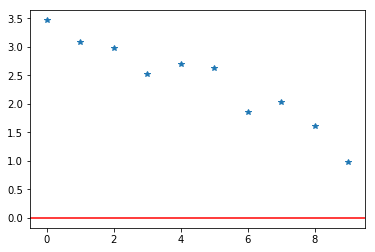

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


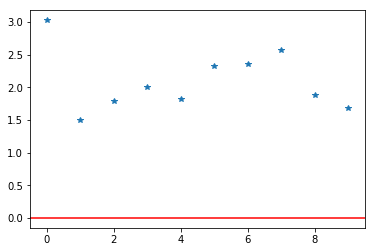

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


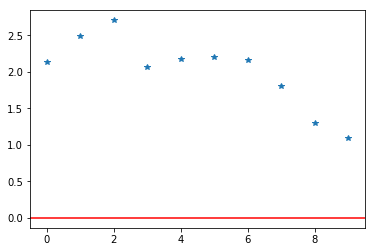

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


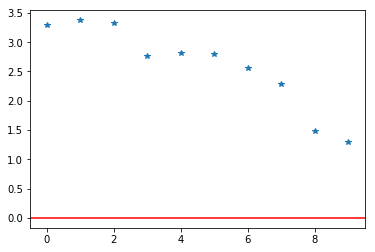

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


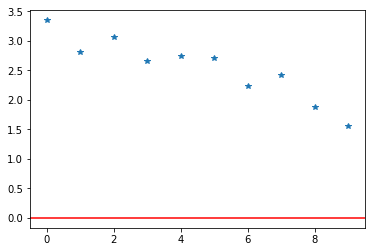

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


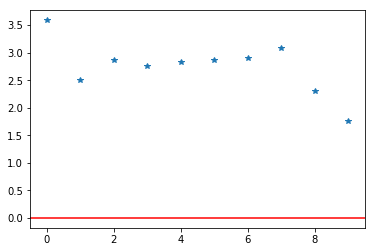

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


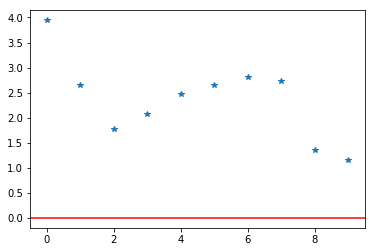

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


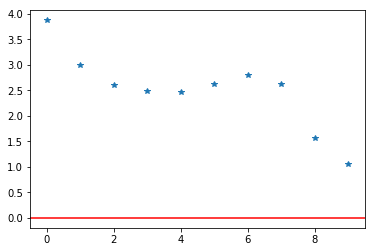

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


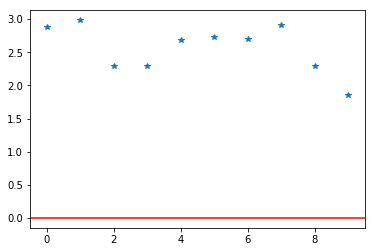

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


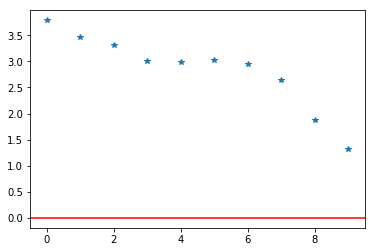

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


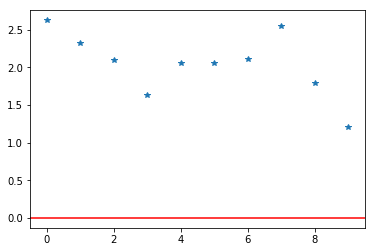

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


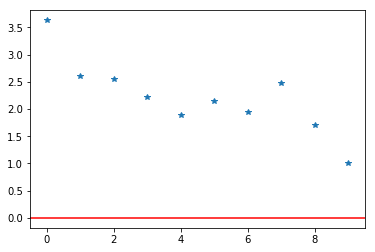

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


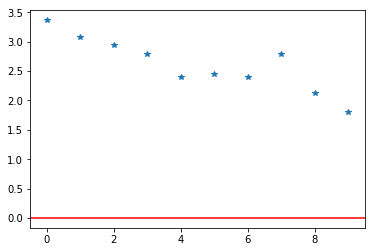

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


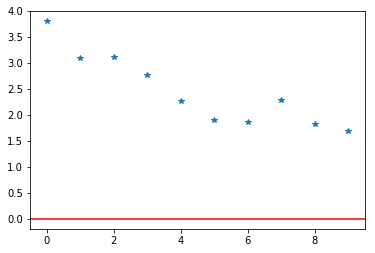

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


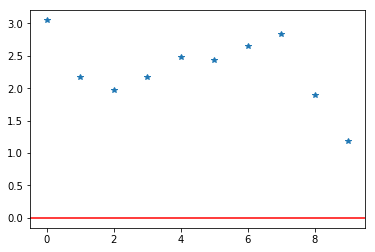

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


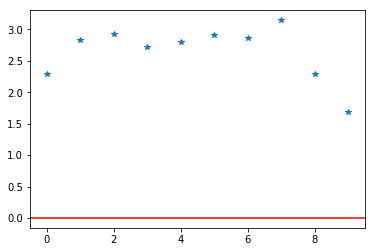

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


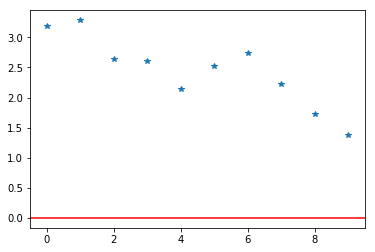

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


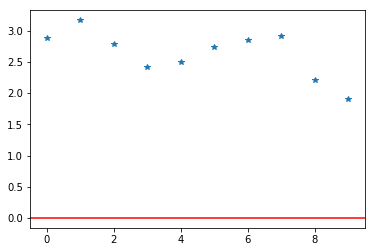

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


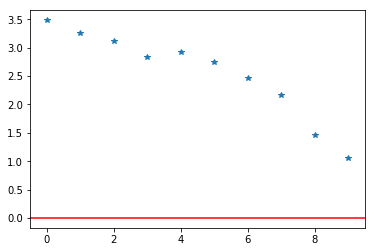

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


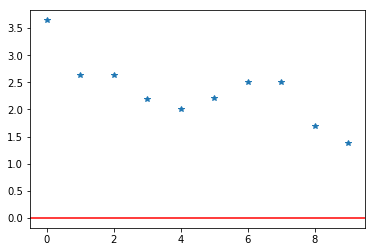

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


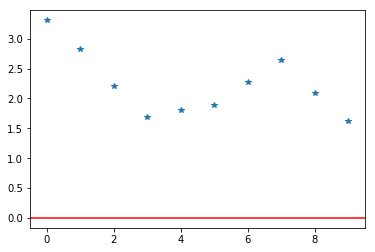

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


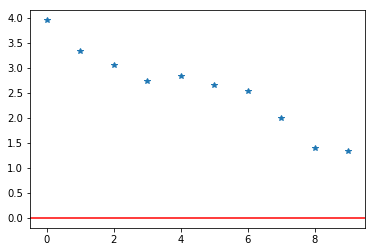

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


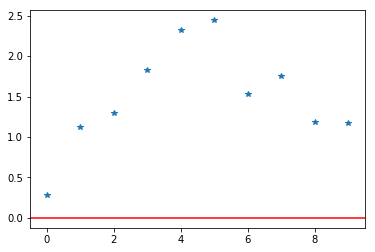

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


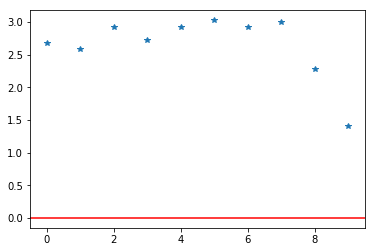

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [18]:
targets2d = targets.reshape((40,10))
for f in range(F):
    plt.plot(range(T), smoothed_scores[f],'*')
    plt.plot([-1, 10], [0,0],'r')
    plt.xlim([-0.5, 9.5])
    plt.show()
    print(targets2d[f])